In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('InterpolatedWithCAPEX2.csv')

In [3]:
df

,Dates,D REVENUE,U CR,D OE,D NOI,U CAPEX,U CWK,D FCF
0,2009-12-31,1884.372544,976.202014,475.249997,757.519678,207.477947,3600.000000,856.600959
1,2010-01-31,1884.566826,983.762225,485.004015,734.017979,207.303532,3638.472896,810.859727
2,2010-02-28,1884.761107,991.322435,494.758033,710.516281,207.129117,3676.945791,765.118495
3,2010-03-31,1884.955389,998.882646,504.512051,687.014582,206.954702,3715.418687,719.377263
4,2010-04-30,1880.767673,1006.377690,481.542613,511.922217,207.283705,3792.839197,732.414605
...,...,...,...,...,...,...,...,...
104,2018-08-31,1785.193900,972.274049,461.469501,414.377788,98.125058,2795.231076,733.164793
105,2018-09-30,1730.706270,953.165883,488.056175,424.307526,95.323030,2858.452805,729.764211
106,2018-10-31,1667.921494,856.900384,471.261535,434.874583,92.144220,2849.606546,737.713784
107,2018-11-30,1605.136718,760.634885,454.466895,445.441639,88.965411,2840.760287,745.663358


In [4]:
dataset = df.values

In [5]:
dataset

array([['2009-12-31', 1884.372544, 976.2020142, 475.24999739999987,
        757.519678, 207.4779469, 3600.0, 856.6009594000002],
       ['2010-01-31', 1884.5668256666668, 983.7622247333335, 485.0040154,
        734.0179793333333, 207.30353190000002, 3638.472895666667,
        810.8597272333334],
       ['2010-02-28', 1884.761107333333, 991.3224352666666,
        494.75803339999993, 710.5162806666667, 207.12911689999999,
        3676.945791333333, 765.1184950666667],
       ['2010-03-31', 1884.955389, 998.8826458, 504.5120514, 687.014582,
        206.9547019, 3715.418687, 719.3772629],
       ['2010-04-30', 1880.767673333333, 1006.3776901999997,
        481.5426128333333, 511.92221730000006, 207.28370463333331,
        3792.8391966666654, 732.4146046],
       ['2010-05-31', 1876.5799576666668, 1013.8727346000001,
        458.5731742666666, 336.8298526000001, 207.61270736666665,
        3870.2597063333333, 745.4519462999999],
       ['2010-06-30', 1872.392242, 1021.367779, 435.6037357, 1

In [6]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [8]:
X_scale

array([[0.21536771, 0.34358992, 0.28760773, 1.        , 0.14011453,
        0.70628215],
       [0.21549004, 0.35192007, 0.32225043, 0.9605532 , 0.13991371,
        0.72165108],
       [0.21561238, 0.36025022, 0.35689312, 0.92110641, 0.13971289,
        0.73702   ],
       [0.21573472, 0.36858036, 0.39153581, 0.88165961, 0.13951207,
        0.75238893],
       [0.21309775, 0.37683871, 0.30995679, 0.58777307, 0.13989088,
        0.78331641],
       [0.21046078, 0.38509706, 0.22837778, 0.29388654, 0.14026969,
        0.8142439 ],
       [0.2078238 , 0.3933554 , 0.14679876, 0.        , 0.1406485 ,
        0.84517139],
       [0.19576386, 0.38652631, 0.09786584, 0.0434695 , 0.14038687,
        0.85238924],
       [0.18370391, 0.37969722, 0.04893292, 0.086939  , 0.14012524,
        0.85960709],
       [0.17164397, 0.37286814, 0.        , 0.1304085 , 0.13986361,
        0.86682494],
       [0.19455526, 0.37922834, 0.05993416, 0.14266337, 0.14557165,
        0.90348124],
       [0.21746656, 0

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(87, 6) (11, 6) (11, 6) (87,) (11,) (11,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
model = Sequential([
    Dense(6, activation='softplus', input_shape=(6,)),
    Dense(32, activation='softplus'),
    Dense(12, activation='softplus'),
    Dense(1, activation='softplus'),
])

In [13]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [14]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=1500,
          validation_data=(X_val, Y_val))

Train on 87 samples, validate on 11 samples
Epoch 1/1500
87/87 [==============================] - 0s 2ms/step - loss: 721.7791 - val_loss: 713.4575
Epoch 2/1500
87/87 [==============================] - 0s 57us/step - loss: 721.6031 - val_loss: 713.3157
Epoch 3/1500
87/87 [==============================] - 0s 34us/step - loss: 721.4620 - val_loss: 713.1887
Epoch 4/1500
87/87 [==============================] - 0s 46us/step - loss: 721.3357 - val_loss: 713.0701
Epoch 5/1500
87/87 [==============================] - 0s 69us/step - loss: 721.2177 - val_loss: 712.9570
Epoch 6/1500
87/87 [==============================] - 0s 58us/step - loss: 721.1052 - val_loss: 712.8474
Epoch 7/1500
87/87 [==============================] - 0s 46us/step - loss: 720.9963 - val_loss: 712.7407
Epoch 8/1500
87/87 [==============================] - 0s 57us/step - loss: 720.8901 - val_loss: 712.6358
Epoch 9/1500
87/87 [==============================] - 0s 46us/step - loss: 720.7859 - val_loss: 712.5325
Epoch 10/150

Epoch 78/1500
87/87 [==============================] - 0s 46us/step - loss: 712.6422 - val_loss: 704.2348
Epoch 79/1500
87/87 [==============================] - 0s 34us/step - loss: 712.4856 - val_loss: 704.0737
Epoch 80/1500
87/87 [==============================] - 0s 46us/step - loss: 712.3273 - val_loss: 703.9109
Epoch 81/1500
87/87 [==============================] - 0s 46us/step - loss: 712.1675 - val_loss: 703.7463
Epoch 82/1500
87/87 [==============================] - 0s 57us/step - loss: 712.0058 - val_loss: 703.5798
Epoch 83/1500
87/87 [==============================] - 0s 58us/step - loss: 711.8424 - val_loss: 703.4116
Epoch 84/1500
87/87 [==============================] - 0s 69us/step - loss: 711.6772 - val_loss: 703.2415
Epoch 85/1500
87/87 [==============================] - 0s 57us/step - loss: 711.5103 - val_loss: 703.0694
Epoch 86/1500
87/87 [==============================] - 0s 57us/step - loss: 711.3414 - val_loss: 702.8954
Epoch 87/1500
87/87 [=========================

Epoch 155/1500
87/87 [==============================] - 0s 46us/step - loss: 693.8214 - val_loss: 684.7011
Epoch 156/1500
87/87 [==============================] - 0s 57us/step - loss: 693.4614 - val_loss: 684.3254
Epoch 157/1500
87/87 [==============================] - 0s 46us/step - loss: 693.0977 - val_loss: 683.9459
Epoch 158/1500
87/87 [==============================] - 0s 34us/step - loss: 692.7304 - val_loss: 683.5624
Epoch 159/1500
87/87 [==============================] - 0s 46us/step - loss: 692.3593 - val_loss: 683.1750
Epoch 160/1500
87/87 [==============================] - 0s 46us/step - loss: 691.9844 - val_loss: 682.7836
Epoch 161/1500
87/87 [==============================] - 0s 80us/step - loss: 691.6058 - val_loss: 682.3881
Epoch 162/1500
87/87 [==============================] - 0s 46us/step - loss: 691.2234 - val_loss: 681.9887
Epoch 163/1500
87/87 [==============================] - 0s 46us/step - loss: 690.8370 - val_loss: 681.5851
Epoch 164/1500
87/87 [===============

Epoch 232/1500
87/87 [==============================] - 0s 92us/step - loss: 652.7585 - val_loss: 641.6356
Epoch 233/1500
87/87 [==============================] - 0s 34us/step - loss: 652.0060 - val_loss: 640.8441
Epoch 234/1500
87/87 [==============================] - 0s 34us/step - loss: 651.2469 - val_loss: 640.0455
Epoch 235/1500
87/87 [==============================] - 0s 57us/step - loss: 650.4811 - val_loss: 639.2398
Epoch 236/1500
87/87 [==============================] - 0s 34us/step - loss: 649.7085 - val_loss: 638.4270
Epoch 237/1500
87/87 [==============================] - 0s 34us/step - loss: 648.9291 - val_loss: 637.6069
Epoch 238/1500
87/87 [==============================] - 0s 57us/step - loss: 648.1429 - val_loss: 636.7797
Epoch 239/1500
87/87 [==============================] - 0s 46us/step - loss: 647.3499 - val_loss: 635.9451
Epoch 240/1500
87/87 [==============================] - 0s 35us/step - loss: 646.5498 - val_loss: 635.1033
Epoch 241/1500
87/87 [===============

Epoch 309/1500
87/87 [==============================] - 0s 34us/step - loss: 572.1584 - val_loss: 556.6880
Epoch 310/1500
87/87 [==============================] - 0s 34us/step - loss: 570.7635 - val_loss: 555.2161
Epoch 311/1500
87/87 [==============================] - 0s 57us/step - loss: 569.3583 - val_loss: 553.7335
Epoch 312/1500
87/87 [==============================] - 0s 46us/step - loss: 567.9430 - val_loss: 552.2400
Epoch 313/1500
87/87 [==============================] - 0s 69us/step - loss: 566.5173 - val_loss: 550.7356
Epoch 314/1500
87/87 [==============================] - 0s 34us/step - loss: 565.0812 - val_loss: 549.2203
Epoch 315/1500
87/87 [==============================] - 0s 46us/step - loss: 563.6349 - val_loss: 547.6938
Epoch 316/1500
87/87 [==============================] - 0s 34us/step - loss: 562.1780 - val_loss: 546.1563
Epoch 317/1500
87/87 [==============================] - 0s 34us/step - loss: 560.7106 - val_loss: 544.6078
Epoch 318/1500
87/87 [===============

Epoch 386/1500
87/87 [==============================] - 0s 46us/step - loss: 431.0432 - val_loss: 407.6928
Epoch 387/1500
87/87 [==============================] - 0s 46us/step - loss: 428.7065 - val_loss: 405.2247
Epoch 388/1500
87/87 [==============================] - 0s 46us/step - loss: 426.3555 - val_loss: 402.7414
Epoch 389/1500
87/87 [==============================] - 0s 46us/step - loss: 423.9899 - val_loss: 400.2429
Epoch 390/1500
87/87 [==============================] - 0s 57us/step - loss: 421.6099 - val_loss: 397.7290
Epoch 391/1500
87/87 [==============================] - 0s 57us/step - loss: 419.2152 - val_loss: 395.1995
Epoch 392/1500
87/87 [==============================] - 0s 46us/step - loss: 416.8059 - val_loss: 392.6547
Epoch 393/1500
87/87 [==============================] - 0s 46us/step - loss: 414.3819 - val_loss: 390.0942
Epoch 394/1500
87/87 [==============================] - 0s 69us/step - loss: 411.9431 - val_loss: 387.5182
Epoch 395/1500
87/87 [===============

Epoch 463/1500
87/87 [==============================] - 0s 34us/step - loss: 231.1102 - val_loss: 231.3491
Epoch 464/1500
87/87 [==============================] - 0s 46us/step - loss: 228.8261 - val_loss: 229.8039
Epoch 465/1500
87/87 [==============================] - 0s 57us/step - loss: 226.7001 - val_loss: 228.5692
Epoch 466/1500
87/87 [==============================] - 0s 34us/step - loss: 224.6823 - val_loss: 227.7477
Epoch 467/1500
87/87 [==============================] - 0s 46us/step - loss: 222.6295 - val_loss: 226.9138
Epoch 468/1500
87/87 [==============================] - 0s 35us/step - loss: 220.5432 - val_loss: 226.0681
Epoch 469/1500
87/87 [==============================] - 0s 46us/step - loss: 218.4246 - val_loss: 225.2112
Epoch 470/1500
87/87 [==============================] - 0s 34us/step - loss: 216.2752 - val_loss: 224.3436
Epoch 471/1500
87/87 [==============================] - 0s 46us/step - loss: 214.0961 - val_loss: 223.4657
Epoch 472/1500
87/87 [===============

Epoch 540/1500
87/87 [==============================] - 0s 46us/step - loss: 125.2821 - val_loss: 181.8212
Epoch 541/1500
87/87 [==============================] - 0s 34us/step - loss: 125.1175 - val_loss: 181.6279
Epoch 542/1500
87/87 [==============================] - 0s 46us/step - loss: 124.9508 - val_loss: 181.4288
Epoch 543/1500
87/87 [==============================] - 0s 46us/step - loss: 124.7817 - val_loss: 181.2238
Epoch 544/1500
87/87 [==============================] - 0s 34us/step - loss: 124.6100 - val_loss: 181.0125
Epoch 545/1500
87/87 [==============================] - 0s 57us/step - loss: 124.4357 - val_loss: 180.7946
Epoch 546/1500
87/87 [==============================] - 0s 34us/step - loss: 124.2587 - val_loss: 180.5701
Epoch 547/1500
87/87 [==============================] - 0s 46us/step - loss: 124.0836 - val_loss: 180.4443
Epoch 548/1500
87/87 [==============================] - 0s 34us/step - loss: 123.9326 - val_loss: 180.3157
Epoch 549/1500
87/87 [===============

Epoch 617/1500
87/87 [==============================] - 0s 34us/step - loss: 113.2213 - val_loss: 169.8652
Epoch 618/1500
87/87 [==============================] - 0s 46us/step - loss: 113.0705 - val_loss: 169.2970
Epoch 619/1500
87/87 [==============================] - 0s 46us/step - loss: 112.9016 - val_loss: 169.6118
Epoch 620/1500
87/87 [==============================] - 0s 34us/step - loss: 112.8129 - val_loss: 169.0386
Epoch 621/1500
87/87 [==============================] - 0s 46us/step - loss: 112.6120 - val_loss: 168.4627
Epoch 622/1500
87/87 [==============================] - 0s 46us/step - loss: 112.5265 - val_loss: 168.7715
Epoch 623/1500
87/87 [==============================] - 0s 35us/step - loss: 112.3499 - val_loss: 168.1895
Epoch 624/1500
87/87 [==============================] - 0s 46us/step - loss: 112.2120 - val_loss: 168.4888
Epoch 625/1500
87/87 [==============================] - 0s 46us/step - loss: 112.0860 - val_loss: 167.9005
Epoch 626/1500
87/87 [===============

Epoch 694/1500
87/87 [==============================] - 0s 34us/step - loss: 101.9194 - val_loss: 153.9019
Epoch 695/1500
87/87 [==============================] - 0s 35us/step - loss: 101.7751 - val_loss: 153.2804
Epoch 696/1500
87/87 [==============================] - 0s 46us/step - loss: 101.6376 - val_loss: 153.3799
Epoch 697/1500
87/87 [==============================] - 0s 46us/step - loss: 101.4809 - val_loss: 152.7360
Epoch 698/1500
87/87 [==============================] - 0s 46us/step - loss: 101.3545 - val_loss: 152.8318
Epoch 699/1500
87/87 [==============================] - 0s 46us/step - loss: 101.1858 - val_loss: 152.9229
Epoch 700/1500
87/87 [==============================] - 0s 46us/step - loss: 101.0685 - val_loss: 152.2349
Epoch 701/1500
87/87 [==============================] - 0s 34us/step - loss: 100.9044 - val_loss: 152.3206
Epoch 702/1500
87/87 [==============================] - 0s 35us/step - loss: 100.7622 - val_loss: 151.6162
Epoch 703/1500
87/87 [===============

Epoch 772/1500
87/87 [==============================] - 0s 34us/step - loss: 90.7874 - val_loss: 137.1097
Epoch 773/1500
87/87 [==============================] - 0s 46us/step - loss: 90.6431 - val_loss: 136.7928
Epoch 774/1500
87/87 [==============================] - 0s 46us/step - loss: 90.5027 - val_loss: 137.1518
Epoch 775/1500
87/87 [==============================] - 0s 34us/step - loss: 90.4310 - val_loss: 135.8447
Epoch 776/1500
87/87 [==============================] - 0s 34us/step - loss: 90.3048 - val_loss: 136.1349
Epoch 777/1500
87/87 [==============================] - 0s 35us/step - loss: 90.0986 - val_loss: 136.4219
Epoch 778/1500
87/87 [==============================] - 0s 34us/step - loss: 89.9825 - val_loss: 135.2079
Epoch 779/1500
87/87 [==============================] - 0s 34us/step - loss: 89.8993 - val_loss: 135.4562
Epoch 780/1500
87/87 [==============================] - 0s 46us/step - loss: 89.7006 - val_loss: 135.7038
Epoch 781/1500
87/87 [========================

Epoch 850/1500
87/87 [==============================] - 0s 46us/step - loss: 80.6538 - val_loss: 120.9276
Epoch 851/1500
87/87 [==============================] - 0s 46us/step - loss: 80.4049 - val_loss: 120.5488
Epoch 852/1500
87/87 [==============================] - 0s 35us/step - loss: 80.2866 - val_loss: 121.1588
Epoch 853/1500
87/87 [==============================] - 0s 46us/step - loss: 80.2399 - val_loss: 120.4391
Epoch 854/1500
87/87 [==============================] - 0s 35us/step - loss: 80.0477 - val_loss: 120.0389
Epoch 855/1500
87/87 [==============================] - 0s 46us/step - loss: 79.9127 - val_loss: 120.3426
Epoch 856/1500
87/87 [==============================] - 0s 57us/step - loss: 79.8242 - val_loss: 119.9130
Epoch 857/1500
87/87 [==============================] - 0s 35us/step - loss: 79.6803 - val_loss: 119.4688
Epoch 858/1500
87/87 [==============================] - 0s 46us/step - loss: 79.5388 - val_loss: 119.8087
Epoch 859/1500
87/87 [========================

Epoch 928/1500
87/87 [==============================] - 0s 34us/step - loss: 71.3521 - val_loss: 106.1188
Epoch 929/1500
87/87 [==============================] - 0s 46us/step - loss: 71.2632 - val_loss: 106.5082
Epoch 930/1500
87/87 [==============================] - 0s 46us/step - loss: 71.1164 - val_loss: 105.6952
Epoch 931/1500
87/87 [==============================] - 0s 57us/step - loss: 71.0427 - val_loss: 106.0998
Epoch 932/1500
87/87 [==============================] - 0s 34us/step - loss: 70.8796 - val_loss: 105.5546
Epoch 933/1500
87/87 [==============================] - 0s 35us/step - loss: 70.7603 - val_loss: 105.6583
Epoch 934/1500
87/87 [==============================] - 0s 35us/step - loss: 70.6333 - val_loss: 105.0707
Epoch 935/1500
87/87 [==============================] - 0s 57us/step - loss: 70.5444 - val_loss: 105.5365
Epoch 936/1500
87/87 [==============================] - 0s 34us/step - loss: 70.4631 - val_loss: 104.2896
Epoch 937/1500
87/87 [========================

Epoch 1006/1500
87/87 [==============================] - 0s 34us/step - loss: 62.7757 - val_loss: 92.5406
Epoch 1007/1500
87/87 [==============================] - 0s 46us/step - loss: 62.6669 - val_loss: 91.6876
Epoch 1008/1500
87/87 [==============================] - 0s 34us/step - loss: 62.6673 - val_loss: 92.4194
Epoch 1009/1500
87/87 [==============================] - 0s 34us/step - loss: 62.5628 - val_loss: 91.1196
Epoch 1010/1500
87/87 [==============================] - 0s 34us/step - loss: 62.5279 - val_loss: 91.8101
Epoch 1011/1500
87/87 [==============================] - 0s 46us/step - loss: 62.2312 - val_loss: 90.9775
Epoch 1012/1500
87/87 [==============================] - 0s 46us/step - loss: 62.2183 - val_loss: 91.4322
Epoch 1013/1500
87/87 [==============================] - 0s 46us/step - loss: 62.0088 - val_loss: 90.5636
Epoch 1014/1500
87/87 [==============================] - 0s 46us/step - loss: 62.0054 - val_loss: 91.2921
Epoch 1015/1500
87/87 [=======================

Epoch 1084/1500
87/87 [==============================] - 0s 46us/step - loss: 54.4395 - val_loss: 78.3008
Epoch 1085/1500
87/87 [==============================] - 0s 46us/step - loss: 54.3083 - val_loss: 78.1394
Epoch 1086/1500
87/87 [==============================] - 0s 46us/step - loss: 54.2396 - val_loss: 77.8875
Epoch 1087/1500
87/87 [==============================] - 0s 46us/step - loss: 54.0887 - val_loss: 77.7590
Epoch 1088/1500
87/87 [==============================] - 0s 35us/step - loss: 53.9679 - val_loss: 77.7643
Epoch 1089/1500
87/87 [==============================] - 0s 34us/step - loss: 53.9443 - val_loss: 77.6657
Epoch 1090/1500
87/87 [==============================] - 0s 46us/step - loss: 53.8474 - val_loss: 77.3135
Epoch 1091/1500
87/87 [==============================] - 0s 35us/step - loss: 53.7157 - val_loss: 77.1459
Epoch 1092/1500
87/87 [==============================] - 0s 46us/step - loss: 53.5320 - val_loss: 77.0408
Epoch 1093/1500
87/87 [=======================

Epoch 1162/1500
87/87 [==============================] - 0s 46us/step - loss: 47.0555 - val_loss: 67.2767
Epoch 1163/1500
87/87 [==============================] - 0s 35us/step - loss: 47.0080 - val_loss: 67.3734
Epoch 1164/1500
87/87 [==============================] - 0s 46us/step - loss: 46.9998 - val_loss: 67.0560
Epoch 1165/1500
87/87 [==============================] - 0s 46us/step - loss: 46.9044 - val_loss: 67.1653
Epoch 1166/1500
87/87 [==============================] - 0s 46us/step - loss: 46.8919 - val_loss: 66.7731
Epoch 1167/1500
87/87 [==============================] - 0s 35us/step - loss: 46.7289 - val_loss: 66.7726
Epoch 1168/1500
87/87 [==============================] - 0s 34us/step - loss: 46.6637 - val_loss: 66.5629
Epoch 1169/1500
87/87 [==============================] - 0s 35us/step - loss: 46.5825 - val_loss: 66.4571
Epoch 1170/1500
87/87 [==============================] - 0s 46us/step - loss: 46.5146 - val_loss: 66.3492
Epoch 1171/1500
87/87 [=======================

Epoch 1240/1500
87/87 [==============================] - 0s 46us/step - loss: 42.5508 - val_loss: 57.4394
Epoch 1241/1500
87/87 [==============================] - 0s 46us/step - loss: 42.5589 - val_loss: 57.7140
Epoch 1242/1500
87/87 [==============================] - 0s 34us/step - loss: 42.4051 - val_loss: 57.4104
Epoch 1243/1500
87/87 [==============================] - 0s 34us/step - loss: 42.3558 - val_loss: 57.3955
Epoch 1244/1500
87/87 [==============================] - 0s 46us/step - loss: 42.2937 - val_loss: 57.2281
Epoch 1245/1500
87/87 [==============================] - 0s 57us/step - loss: 42.2452 - val_loss: 57.2204
Epoch 1246/1500
87/87 [==============================] - 0s 46us/step - loss: 42.2171 - val_loss: 56.8685
Epoch 1247/1500
87/87 [==============================] - 0s 46us/step - loss: 42.1672 - val_loss: 57.0449
Epoch 1248/1500
87/87 [==============================] - 0s 34us/step - loss: 42.1713 - val_loss: 56.5339
Epoch 1249/1500
87/87 [=======================

Epoch 1318/1500
87/87 [==============================] - 0s 57us/step - loss: 39.7193 - val_loss: 48.4488
Epoch 1319/1500
87/87 [==============================] - 0s 34us/step - loss: 39.6750 - val_loss: 48.5587
Epoch 1320/1500
87/87 [==============================] - 0s 46us/step - loss: 39.6619 - val_loss: 48.1683
Epoch 1321/1500
87/87 [==============================] - 0s 46us/step - loss: 39.6106 - val_loss: 48.2867
Epoch 1322/1500
87/87 [==============================] - 0s 46us/step - loss: 39.6031 - val_loss: 47.8782
Epoch 1323/1500
87/87 [==============================] - 0s 46us/step - loss: 39.5466 - val_loss: 48.0043
Epoch 1324/1500
87/87 [==============================] - 0s 57us/step - loss: 39.5428 - val_loss: 47.5786
Epoch 1325/1500
87/87 [==============================] - 0s 34us/step - loss: 39.4830 - val_loss: 47.7115
Epoch 1326/1500
87/87 [==============================] - 0s 46us/step - loss: 39.4811 - val_loss: 47.2697
Epoch 1327/1500
87/87 [=======================

Epoch 1396/1500
87/87 [==============================] - 0s 46us/step - loss: 38.3074 - val_loss: 46.5837
Epoch 1397/1500
87/87 [==============================] - 0s 46us/step - loss: 38.3864 - val_loss: 45.6695
Epoch 1398/1500
87/87 [==============================] - 0s 34us/step - loss: 38.1931 - val_loss: 44.7342
Epoch 1399/1500
87/87 [==============================] - 0s 34us/step - loss: 38.3592 - val_loss: 46.3078
Epoch 1400/1500
87/87 [==============================] - 0s 34us/step - loss: 38.3201 - val_loss: 45.4132
Epoch 1401/1500
87/87 [==============================] - 0s 34us/step - loss: 38.1521 - val_loss: 45.2349
Epoch 1402/1500
87/87 [==============================] - 0s 34us/step - loss: 38.1540 - val_loss: 46.5184
Epoch 1403/1500
87/87 [==============================] - 0s 58us/step - loss: 38.3579 - val_loss: 45.5840
Epoch 1404/1500
87/87 [==============================] - 0s 46us/step - loss: 38.1604 - val_loss: 44.6292
Epoch 1405/1500
87/87 [=======================

Epoch 1474/1500
87/87 [==============================] - 0s 46us/step - loss: 37.8620 - val_loss: 44.9901
Epoch 1475/1500
87/87 [==============================] - 0s 46us/step - loss: 37.9746 - val_loss: 43.9260
Epoch 1476/1500
87/87 [==============================] - 0s 46us/step - loss: 37.7899 - val_loss: 44.1407
Epoch 1477/1500
87/87 [==============================] - 0s 46us/step - loss: 37.7921 - val_loss: 43.9029
Epoch 1478/1500
87/87 [==============================] - 0s 46us/step - loss: 37.7802 - val_loss: 44.1396
Epoch 1479/1500
87/87 [==============================] - 0s 34us/step - loss: 37.7961 - val_loss: 42.9100
Epoch 1480/1500
87/87 [==============================] - 0s 34us/step - loss: 38.0459 - val_loss: 45.0789
Epoch 1481/1500
87/87 [==============================] - 0s 57us/step - loss: 37.9992 - val_loss: 44.0541
Epoch 1482/1500
87/87 [==============================] - 0s 34us/step - loss: 37.7779 - val_loss: 43.4062
Epoch 1483/1500
87/87 [=======================

In [15]:
import matplotlib.pyplot as plt

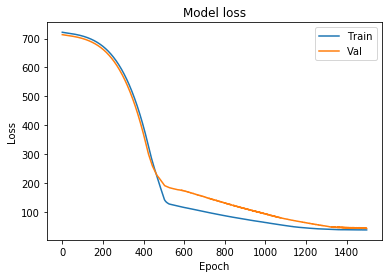

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()